# **Correlation Study**

## Objectives

* Identify variables with most significant correlation to the sale price 
to answer the first business requirement.

## Inputs

* outputs/datasets/cleaned/FullSetCleaned.csv

## Outputs

* Explanations of analysis and visualisations to back up strategic approach.

## Crisp-DM

* Data Understanding


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [5]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/house-prices-ml/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [6]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [7]:
current_dir = os.getcwd()
current_dir

'/workspaces/house-prices-ml'

# Load Data

Load data and display head to check that it has been loaded.

In [8]:
import pandas as pd
df_sales = pd.read_csv("outputs/datasets/cleaned/FullSetCleaned.csv")
print("Sales Data")
df_sales.head()


Sales Data


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,864,0.0,3.0,No,432,ALQ,432,0.0,0,none,...,70.0,0.0,0,5,4,864,0.0,1971,1971,115000
1,864,0.0,3.0,No,398,ALQ,317,0.0,720,RFn,...,60.0,0.0,0,8,5,864,0.0,1950,2002,129000
2,840,828.0,3.0,No,0,none,840,0.0,500,RFn,...,72.0,101.0,68,5,7,840,0.0,2003,2003,180000
3,990,1611.0,4.0,No,0,Unf,612,0.0,621,RFn,...,51.0,0.0,0,6,5,612,0.0,1921,1998,189000
4,1496,636.0,1.0,Gd,1441,GLQ,55,0.0,612,Fin,...,79.0,0.0,40,8,8,1496,349.0,1983,2009,316600


---

# Dataset Analysis 

We will look again at the pandas profile report, this time with the cleaned data and no missing values. 

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df_sales, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations from profiling


Our data has 4 categorical variables which must be converted to a numerical data type values to facilitate the correlation calculations.

For this we will use the OneHotEncoder function.

In [9]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df_sales.columns[df_sales.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df_sales)
print(df_ohe.shape)
df_ohe.head(5)


(1460, 40)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_Rec,BsmtFinType1_BLQ,GarageFinish_none,GarageFinish_RFn,GarageFinish_Fin,GarageFinish_Unf,KitchenQual_TA,KitchenQual_Gd,KitchenQual_Ex,KitchenQual_Fa
0,864,0.0,3.0,432,432,0.0,0,1980.0,864,10500,...,0,0,1,0,0,0,1,0,0,0
1,864,0.0,3.0,398,317,0.0,720,1980.0,864,7200,...,0,0,0,1,0,0,0,1,0,0
2,840,828.0,3.0,0,840,0.0,500,2003.0,1668,11317,...,0,0,0,1,0,0,0,1,0,0
3,990,1611.0,4.0,0,612,0.0,621,1998.0,2601,9842,...,0,0,0,1,0,0,1,0,0,0
4,1496,636.0,1.0,1441,55,0.0,612,1983.0,2132,12327,...,0,0,0,0,1,0,0,1,0,0


As expected, our dataset now has additional columns (total of 40). This is due to OneHotEncoder translating each category into its own column, and assigning a value of 1 or 0. A value of 1 means the property has this category. 

### Correlation Functions

Now we use the corr() function with spearman and pearson methods to determine which variables warrant further investigation.


In [11]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
GarageYrBlt       0.563256
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

In [12]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

Now we combine the outputs, adding the two correlation values for a single result to evaluate.

In [15]:
combined_corr = corr_spearman.add(corr_pearson, fill_value=0)

# Convert to DataFrame and sort by total correlation value
combined_corr = combined_corr.sort_values(ascending=False)

print(combined_corr)

OverallQual       1.600810
GrLivArea         1.439934
GarageArea        1.272810
TotalBsmtSF       1.216306
1stFlrSF          1.181260
YearBuilt         1.175579
YearRemodAdd      1.078260
GarageYrBlt       0.563256
KitchenQual_Ex    0.504094
KitchenQual_Gd    0.478583
MasVnrArea        0.472614
KitchenQual_TA   -1.101101
Name: SalePrice, dtype: float64


From here we will choose the top 6 variables for further analysis as the 4th, 5th and 6th in the list are very closely rated from our correlation calculations. 

In [9]:
vars_to_study = [
    'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF','YearBuilt'
    ]


Numerical Variables: ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
Categorical Variables: []


### Bivariate study

We will use scatter plots and box plots to visualise the relationships between our variables and the sale price. We will save the visualisations to display them on the dashboard.


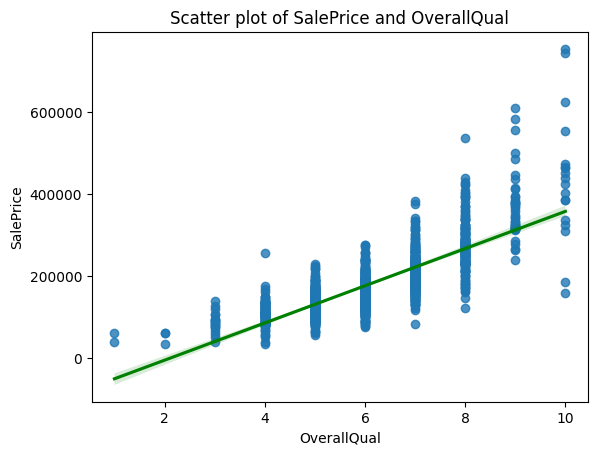

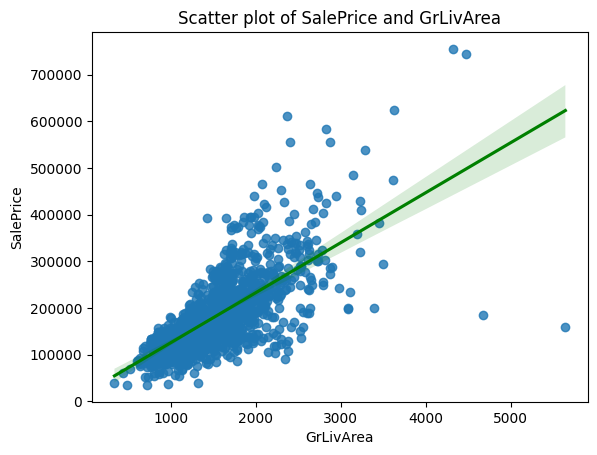

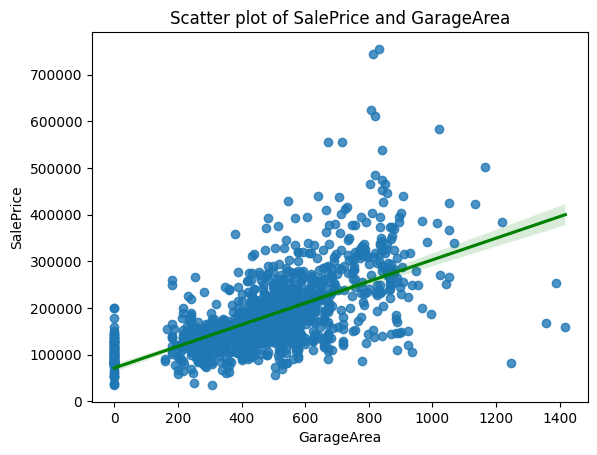

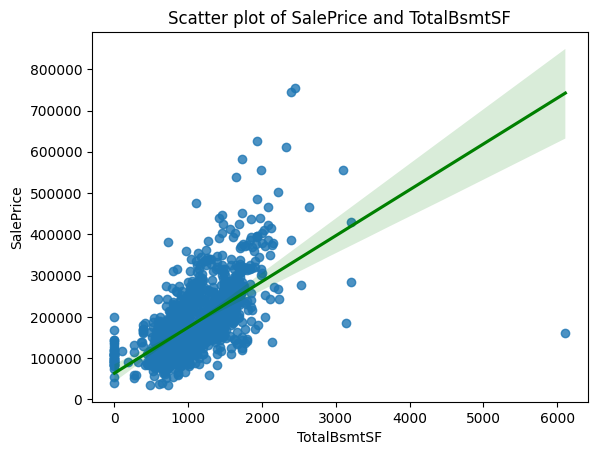

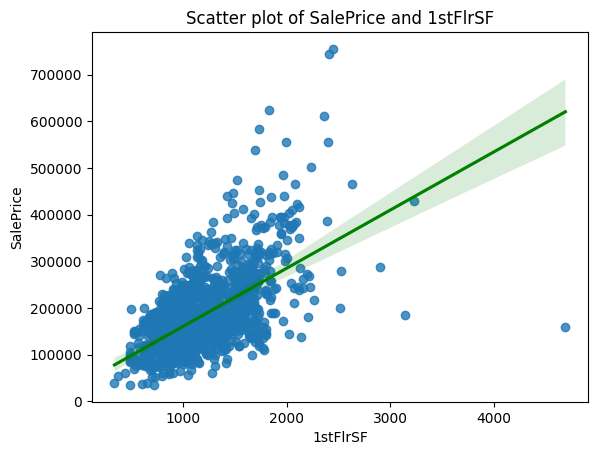

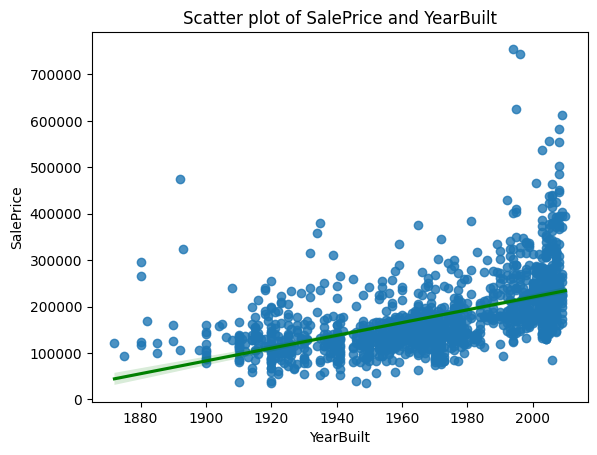

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for category in vars_to_study:
    plt.figure()
    sns.regplot(x=category, y="SalePrice", data=df_sales, line_kws={"color": "green"}).set(
        title=f'Scatter plot of SalePrice and {category}')
    

/tmp/ipykernel_645/1489746006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="OverallQual", y="SalePrice", hue=None, data=df_sales, palette="bright").set(


[Text(0.5, 1.0, 'Box plot of SalePrice and OverallQual')]

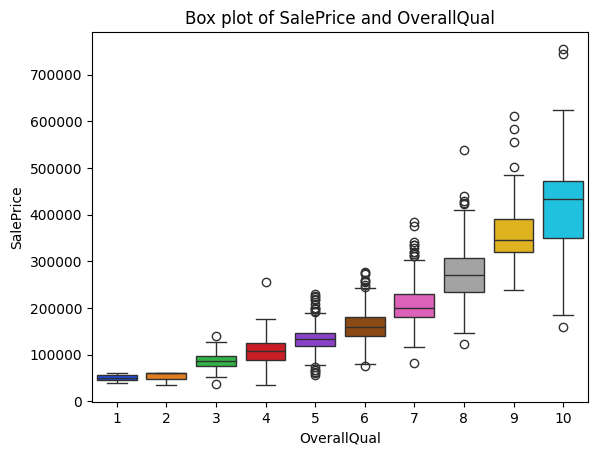

In [27]:
plt.figure()
sns.boxplot(x="OverallQual", y="SalePrice", hue=None, data=df_sales, palette="bright").set(
    title="Box plot of SalePrice and OverallQual")

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
